# **Essential Water Quality Analysis & Prediction**

Team members:


1.   Donifa Babu B M
2.   Eshwaran ABR
3.   Sadurthika M
4.   Vishnuram VR

# Upload dataset

In [363]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore

In [364]:
# Importing the dataset
df = pd.read_csv("water_dataX.csv", encoding= 'unicode_escape')
# Selecting 1900 samples, because samples having indices greater than 1900 are not correct
df = df.iloc[0:1900, :]
df.shape

(1900, 12)

In [365]:
# Checking for datatypes of the dataset
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [366]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1900 non-null   object
 1   LOCATIONS                         1900 non-null   object
 2   STATE                             1900 non-null   object
 3   Temp                              1900 non-null   object
 4   D.O. (mg/l)                       1900 non-null   object
 5   PH                                1900 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1900 non-null   object
 7   B.O.D. (mg/l)                     1900 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1900 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1900 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1900 non-null   object
 11  year                              1900 non-null   int64 
dtypes: int64(1), object(

In [368]:
df.shape

(1900, 12)

In [369]:
df.describe()

,year
count,1900.000000
mean,2010.373158
std,2.708444
min,2005.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


# Handling missing values

In [370]:
# Converting object data type to numeric
def convert_to_numeric(df):
    num_col = df.shape[1]
    # Start from index 3
    for index in range(3, num_col):
        col_name = df.iloc[:, index].name
        df[col_name] = pd.to_numeric(df[col_name], errors="coerce")
    return df

df = convert_to_numeric(df)
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [371]:
df.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 89
D.O. (mg/l)                          30
PH                                    7
CONDUCTIVITY (µmhos/cm)              24
B.O.D. (mg/l)                        42
NITRATENAN N+ NITRITENANN (mg/l)    189
FECAL COLIFORM (MPN/100ml)          280
TOTAL COLIFORM (MPN/100ml)Mean      130
year                                  0
dtype: int64

In [372]:
#Let us rename the columns for simplification
df = df.rename(columns={"D.O. (mg/l)": "DO", "CONDUCTIVITY (µmhos/cm)": "CO", "B.O.D. (mg/l)": "BOD", "NITRATENAN N+ NITRITENANN (mg/l)": "NI", "FECAL COLIFORM (MPN/100ml)": "Fec_col", "TOTAL COLIFORM (MPN/100ml)Mean": "Tot_col"})


In [373]:
df[ 'Temp' ].fillna(df[ 'Temp' ].mean(), inplace=True)
df['DO'].fillna(df['DO'].mean(), inplace=True)
df['PH'].fillna(df['PH'].mean(), inplace=True)
df['CO'].fillna(df['CO'].mean(), inplace=True)
df['BOD'].fillna(df['BOD'].mean(), inplace=True)
df['NI'].fillna(df[ 'NI'].mean(), inplace=True)
df['Tot_col'].fillna(df[ 'Tot_col'].mean(), inplace=True)

In [374]:
df.drop(columns=['Fec_col'])

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CO,BOD,NI,Tot_col,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.50,203.0,6.857892,0.100000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.20,189.0,2.000000,0.200000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.90,179.0,1.700000,0.100000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.90,64.0,3.800000,0.500000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.30,83.0,1.900000,0.400000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...
1895,NAN,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,27.000000,7.4,7.00,88.5,0.977000,0.186000,105.0,2005
1896,NAN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.193505,6.6,7.81,603.2,2.675000,0.263000,191.0,2005
1897,NAN,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,28.000000,6.6,7.49,571.5,2.091000,0.256000,273.0,2005
1898,NAN,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,5.4,7.16,75.8,2.092000,1.658681,513.0,2005


In [375]:
df.columns

Index(['STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'DO', 'PH', 'CO', 'BOD',
       'NI', 'Fec_col', 'Tot_col', 'year'],
      dtype='object')

# Water Quality Index Calculation

In [376]:
#calulation of Ph

df[ 'npH' ]=df.PH. apply(lambda x: (100 if (8.5>=x>=7)
                                else(80 if (8.6>= x >=8.5) or (6.9>=x>=6.8)
                                    else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
                                        else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                            else 0)))))

In [377]:
#calculation of dissolved oxygen
df[ 'ndo' ]=df. DO. apply(lambda x: (100 if (x>=6)

else(80 if (6>=x>=5.1)
else(60 if (5>=x>=4.1)
else(40 if (4>=x>=3)
else 0) )) ) )

In [378]:
#calculation of total coliform
df[ 'nco' ]=df.Tot_col . apply(lambda x: (100 if (5>=x>=0)
else(80 if (50>=x>=5)

else(60 if (500>=x>=50)
else(40 if (10000>=x>=500)
else 0) ))) )



In [379]:
#calc of B.D.O

df[ 'nbdo' ]=df.BOD. apply(lambda x: (100 if (3>=x>=0)
else(80 if (6>=x>=3)

else(60 if (80>=x>=6)
else(40 if (125>=x>=80)
else 0)))) )

In [380]:
#calculation of electrical conductivity
df[ 'nec' ]=df.CO. apply (lambda x: (100 if (75>=x>=0)
else(80 if (150>=x>=75)

else(60 if (225>=x>=150)
else(40 if (300>=x>=225)
else 0))) ) )


In [381]:
#Calulation of nitrate
df[ 'nna' ]=df. NI. apply( lambda x: (100 if (20>=x>=0)
else(80 if (50>=x>=20)

else(60 if (100>=x>=50)
else(40 if (200>=x>=100)
else 0) ) ) ) )

In [382]:
# Calculate water quality index WQI
df[ 'wph' ]=df.npH * 0.165
df[ 'wdo' ]=df. ndo * 0.281

df[ 'wbdo' ]=df. nbdo * 0.234
df[ 'wec' ]=df.nec* 0.009
df[ 'wna' ]=df.nna * 0.028

df[ 'wco' ]=df.nco * 0.281
df[ 'wqi' ]=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco
df

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CO,BOD,NI,Fec_col,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.50,203.0,6.857892,0.100000,11.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.20,189.0,2.000000,0.200000,4953.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.90,179.0,1.700000,0.100000,3243.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.90,64.0,3.800000,0.500000,5382.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.30,83.0,1.900000,0.400000,3428.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,NAN,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,27.000000,7.4,7.00,88.5,0.977000,0.186000,27.0,...,100,80,100,16.5,28.10,23.40,0.72,2.8,16.86,88.38
1896,NAN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.193505,6.6,7.81,603.2,2.675000,0.263000,40.0,...,100,0,100,16.5,28.10,23.40,0.00,2.8,16.86,87.66
1897,NAN,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,28.000000,6.6,7.49,571.5,2.091000,0.256000,151.0,...,100,0,100,16.5,28.10,23.40,0.00,2.8,16.86,87.66
1898,NAN,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,5.4,7.16,75.8,2.092000,1.658681,404.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


In [383]:
#calculation overall wai for each year
average=df. groupby( 'year' ) [ 'wqi' ]. mean()
average . head()

year
2005    74.013729
2006    72.909714
2007    74.233000
2008    73.506289
2009    74.456685
Name: wqi, dtype: float64

# Visualization of Dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


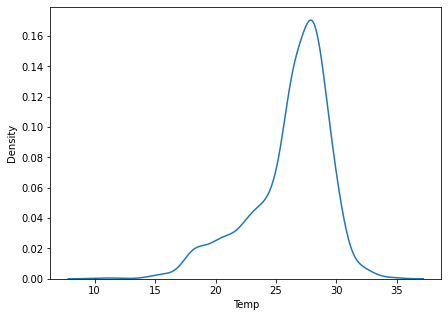

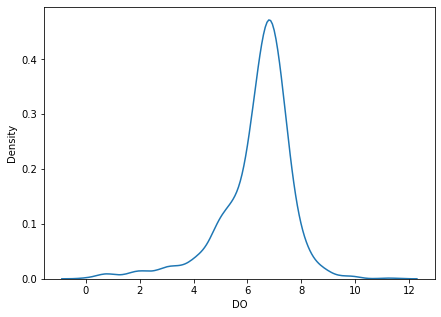

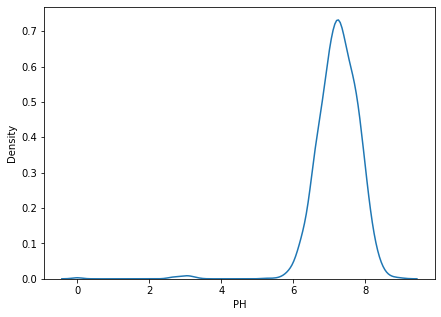

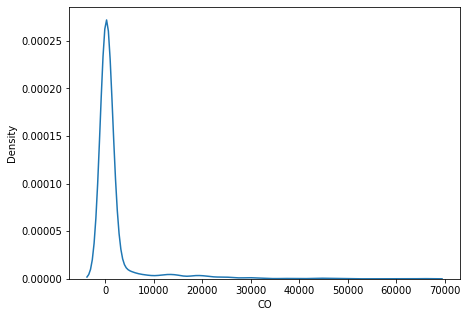

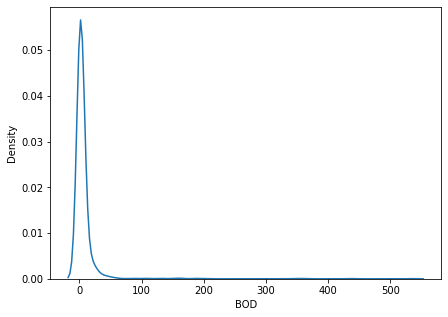

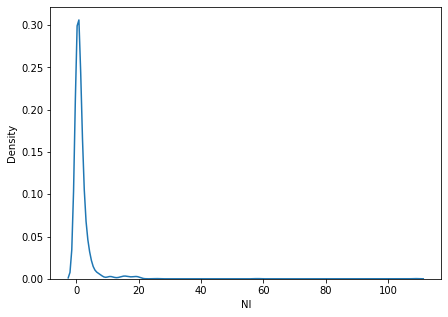

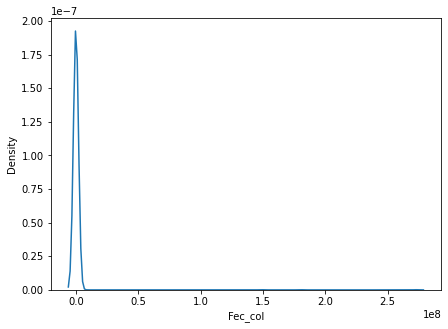

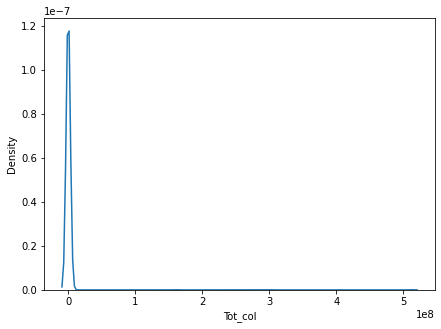

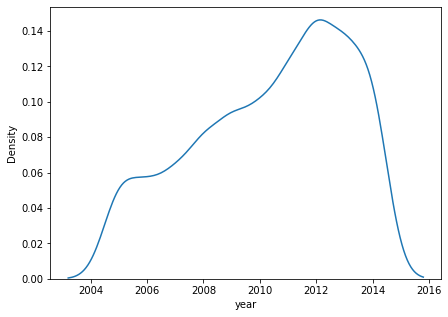

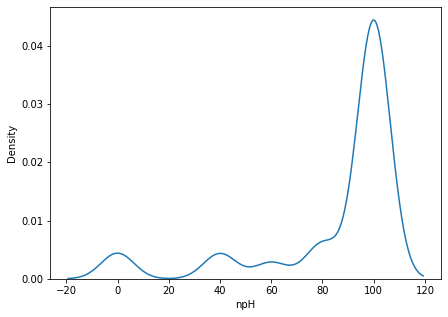

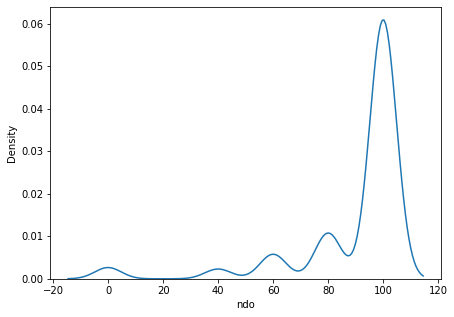

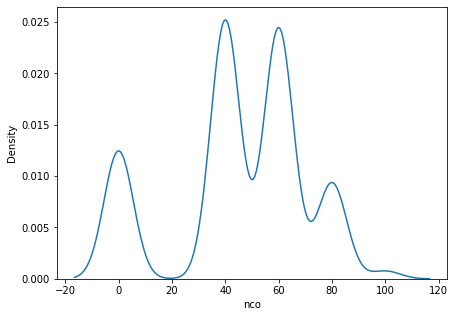

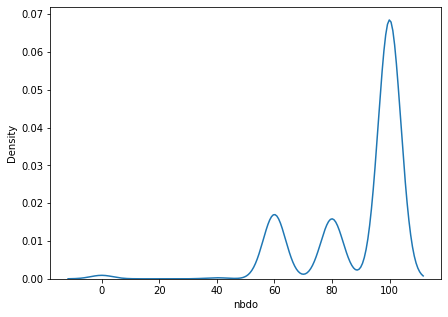

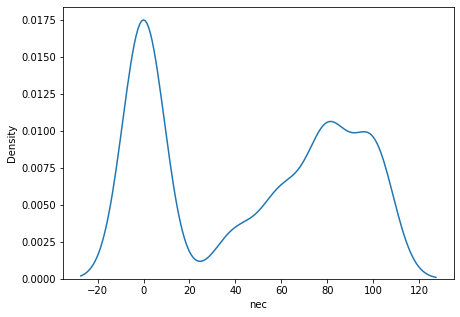

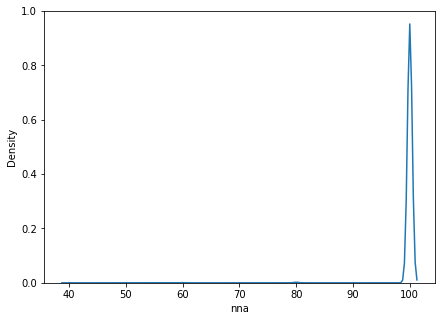

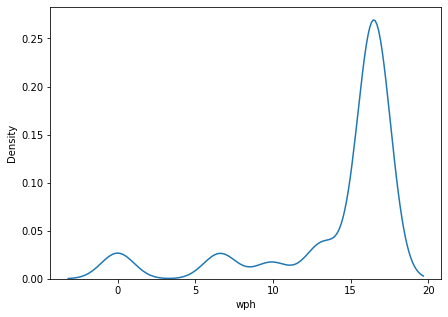

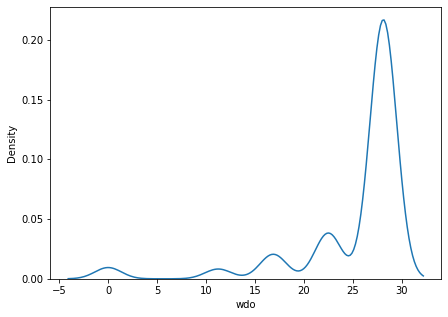

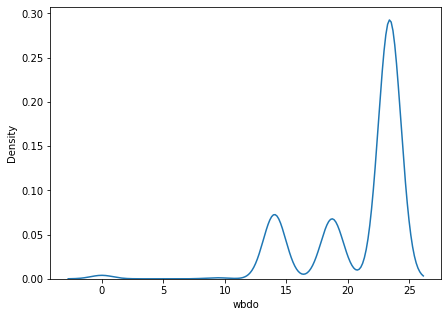

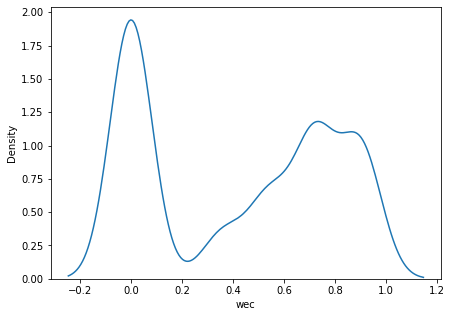

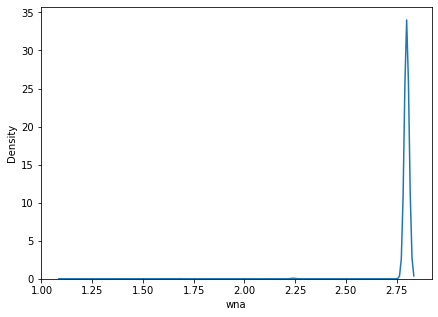

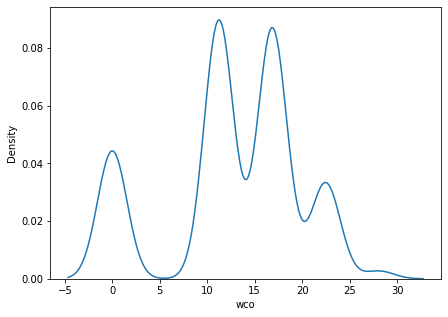

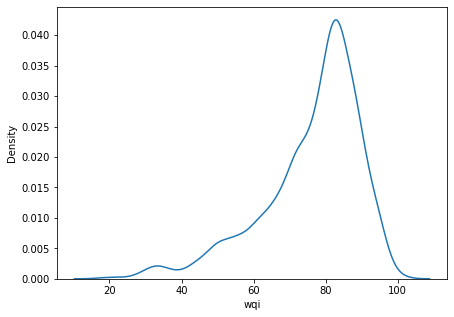

In [384]:
# PLotting PDFs of all the numeric attributes in the dataset

df = df.select_dtypes(exclude="object")

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(df)

# Classification based on WQI

In [385]:
df.shape

(1900, 22)

In [386]:
df['wqi']

0       84.46
1       76.96
2       79.28
3       69.34
4       77.14
        ...  
1895    88.38
1896    87.66
1897    87.66
1898    77.14
1899    77.14
Name: wqi, Length: 1900, dtype: float64

In [387]:
df.columns

Index(['Temp', 'DO', 'PH', 'CO', 'BOD', 'NI', 'Fec_col', 'Tot_col', 'year',
       'npH', 'ndo', 'nco', 'nbdo', 'nec', 'nna', 'wph', 'wdo', 'wbdo', 'wec',
       'wna', 'wco', 'wqi'],
      dtype='object')

In [388]:
df.tail()

,Temp,DO,PH,CO,BOD,NI,Fec_col,Tot_col,year,npH,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
1895,27.000000,7.4,7.00,88.5,0.977,0.186000,27.0,105.0,2005,100,...,100,80,100,16.5,28.10,23.4,0.72,2.8,16.86,88.38
1896,26.193505,6.6,7.81,603.2,2.675,0.263000,40.0,191.0,2005,100,...,100,0,100,16.5,28.10,23.4,0.00,2.8,16.86,87.66
1897,28.000000,6.6,7.49,571.5,2.091,0.256000,151.0,273.0,2005,100,...,100,0,100,16.5,28.10,23.4,0.00,2.8,16.86,87.66
1898,28.000000,5.4,7.16,75.8,2.092,1.658681,404.0,513.0,2005,100,...,100,80,100,16.5,22.48,23.4,0.72,2.8,11.24,77.14
1899,30.000000,5.4,7.37,104.8,1.802,0.215000,456.0,557.0,2005,100,...,100,80,100,16.5,22.48,23.4,0.72,2.8,11.24,77.14


In [389]:
df.describe()

,Temp,DO,PH,CO,BOD,NI,Fec_col,Tot_col,year,npH,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1.620000e+03,1.900000e+03,1900.000000,1900.000000,...,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,26.193505,6.354635,7.227912,1871.808225,6.857892,1.658681,3.748371e+05,5.604394e+05,2010.373158,84.926316,...,89.221053,46.915789,99.905263,14.012842,25.207179,20.877726,0.422242,2.797347,12.834305,76.151642
std,3.294322,1.333341,0.649011,5634.005557,27.381555,3.938236,8.912142e+06,1.407929e+07,2.708444,29.109024,...,17.609167,41.203118,1.889934,4.802989,6.156114,4.120545,0.370828,0.052918,7.023706,13.607085
min,10.000000,0.000000,0.000000,11.000000,0.100000,0.000000,0.000000e+00,0.000000e+00,2005.000000,0.000000,...,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.120000,0.000000,19.300000
25%,25.000000,5.900000,6.900000,88.000000,1.200000,0.270000,3.300000e+01,1.147500e+02,2008.000000,80.000000,...,80.000000,0.000000,100.000000,13.200000,22.480000,18.720000,0.000000,2.800000,11.240000,70.800000
50%,27.000000,6.600000,7.300000,202.000000,1.900000,0.620000,2.330000e+02,5.410000e+02,2011.000000,100.000000,...,100.000000,60.000000,100.000000,16.500000,28.100000,23.400000,0.540000,2.800000,11.240000,79.640000
75%,28.300000,7.100000,7.600000,668.000000,3.900000,1.658681,1.074250e+03,2.983500e+03,2013.000000,100.000000,...,100.000000,80.000000,100.000000,16.500000,28.100000,23.400000,0.720000,2.800000,16.860000,84.360000
max,35.000000,11.400000,9.010000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08,2014.000000,100.000000,...,100.000000,100.000000,100.000000,16.500000,28.100000,23.400000,0.900000,2.800000,28.100000,99.800000


In [390]:
df.dtypes

Temp       float64
DO         float64
PH         float64
CO         float64
BOD        float64
NI         float64
Fec_col    float64
Tot_col    float64
year         int64
npH          int64
ndo          int64
nco          int64
nbdo         int64
nec          int64
nna          int64
wph        float64
wdo        float64
wbdo       float64
wec        float64
wna        float64
wco        float64
wqi        float64
dtype: object

# Prediction - 5 Algorithms
#  & Model Evaluation 

In [391]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [392]:
#Splitting the data into dependent and independent variables
X= df[['year', 'DO', 'PH', 'CO','BOD','NI','Tot_col']]  
df['wqi']=df['wqi'].astype('int')
Y= df[['wqi']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [393]:
X.shape

(1900, 7)

In [394]:
Y.shape

(1900, 1)

In [395]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn import metrics 
import math
from sklearn.metrics import mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split( X, Y,test_size=0.2, random_state=10)

#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

#{Decision Tree Model}
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
clf_pred=clf.predict(X_test)
clf_accuracy=metrics.accuracy_score(Y_test,clf_pred)
print("1) Using Decision Tree Prediction, Accuracy is " + str(clf_accuracy))

#{K Neighbors Classifier}
knn = KNeighborsClassifier(n_neighbors=7)
knn=knn.fit(X_train,Y_train.values.ravel())
knn_pred=knn.predict(X_test)
knn_accuracy=metrics.accuracy_score(Y_test,knn_pred)
print ("2) Using K Neighbors Classifier Prediction, Accuracy is " + str(knn_accuracy))

#{using MLPClassifier}
mlpc = MLPClassifier()
mlpc.fit(X_train,Y_train.values.ravel())
mlpc_pred=mlpc.predict(X_test)
mlpc_accuracy=metrics.accuracy_score(Y_test,mlpc_pred)
print ("3) Using MLPC Classifier Prediction, Accuracy is " + str(mlpc_accuracy))

#{using MLPClassifier}
rfor = RandomForestClassifier()
rfor.fit(X_train,Y_train.values.ravel())
rfor_pred=rfor.predict(X_test)
rfor_accuracy=metrics.accuracy_score(Y_test,rfor_pred)
print ("4) Using RandomForest Classifier Prediction, Accuracy is " + str(rfor_accuracy))

#{using Linear Regression}
linreg=linear_model.LinearRegression()
linreg.fit(X_train,Y_train)
linreg_pred=rfor.predict(X_test)
linreg_accuracy=metrics.accuracy_score(Y_test,linreg_pred)
rmse = math.sqrt(mean_squared_error(Y_test,linreg_pred))
print ("5) Using Linear Regression Prediction, Accuracy is " + str(linreg_accuracy))

1) Using Decision Tree Prediction, Accuracy is 0.8157894736842105
2) Using K Neighbors Classifier Prediction, Accuracy is 0.3157894736842105
3) Using MLPC Classifier Prediction, Accuracy is 0.12368421052631579
4) Using RandomForest Classifier Prediction, Accuracy is 0.8210526315789474
5) Using Linear Regression Prediction, Accuracy is 0.8210526315789474


# Accuracy found maximum in RandomForest and Linear Regression



*   Decision Tree - 81.57%
*   KNN - 31.57%
*   MLPC classifier - 12.36%
*   Random Forest - 82.10%
*   Linear Regression - 82.10% 



# Model Evaluation

In [396]:
metrics.confusion_matrix(Y_test, rfor_pred)

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 12,  0,  0],
       [ 0,  0,  0, ...,  0, 11,  0],
       [ 0,  0,  0, ...,  1,  1,  1]])

In [397]:
print(metrics.classification_report(Y_test, rfor_pred))

              precision    recall  f1-score   support

          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          33       0.67      1.00      0.80         4
          37       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          44       0.50      0.67      0.57         3
          45       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         0
          50       0.71      0.83      0.77         6
          51       0.00      0.00      0.00         2
          52       0.00      0.00      0.00         1
          53       0.00      0.00      0.00         1
          54       0.00      0.00      0.00         1
          55       0.85      0.85      0.85        13
          56       0.00      0.00      0.00         2
          58       0.00      0.00      0.00         1
          59       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1


# Saving the model

In [398]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [399]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('WaterQuality_RFModel.pkl', 'wb') as files:
    pickle.dump(rfor, files)

# Example

In [400]:
#Working out on input values
t=[[ 6.7,7.50,203.0,1.8965,0.100,27.0,2001]]
output=rfor.predict(t)
output


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([82])

# END OF ANALYSIS